<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 42.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.3 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here

missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values per column:")
print(missing_data)

employment_mode = df['Employment'].mode()[0]
df['Employment'] = df['Employment'].fillna(employment_mode)

remote_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode)

df.dropna(subset=['JobSat'], inplace=True)

print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values per column:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


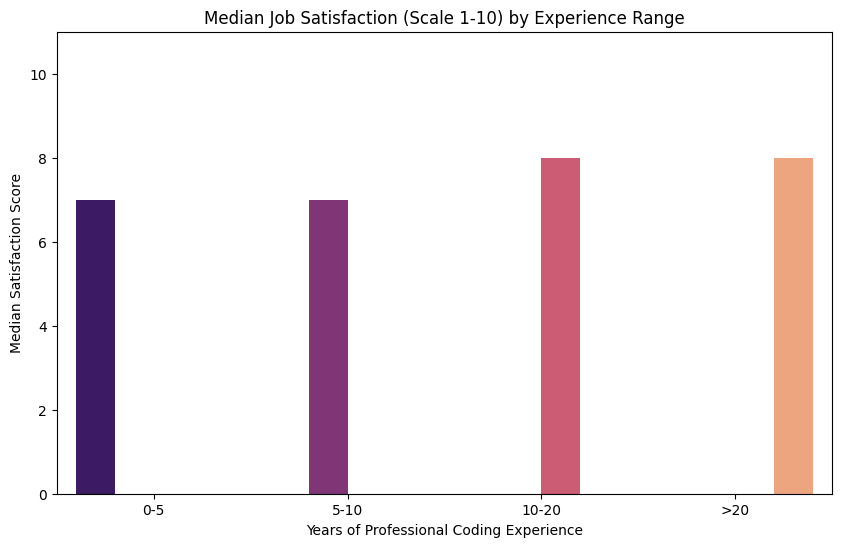

Final Table for Plotting:
  ExperienceRange  JobSat_Score
0             0-5           7.0
1            5-10           7.0
2           10-20           8.0
3             >20           8.0


In [9]:
## Write your code here
df['JobSat_Score'] = pd.to_numeric(df['JobSat'], errors='coerce')

df['YearsCodePro'] = df['YearsCodePro'].astype(str).str.replace('More than 50 years', '51')
df['YearsCodePro'] = df['YearsCodePro'].str.replace('Less than 1 year', '0.5')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').fillna(0)

bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

median_sat = df.dropna(subset=['JobSat_Score']).groupby('ExperienceRange', observed=True)['JobSat_Score'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=median_sat, x='ExperienceRange', y='JobSat_Score', hue='ExperienceRange', palette='magma', legend=False)

plt.title('Median Job Satisfaction (Scale 1-10) by Experience Range')
plt.ylabel('Median Satisfaction Score')
plt.xlabel('Years of Professional Coding Experience')
# Adjusting ylim to 10 since your data goes up to 10
plt.ylim(0, 11) 
plt.show()

print("Final Table for Plotting:")
print(median_sat)

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


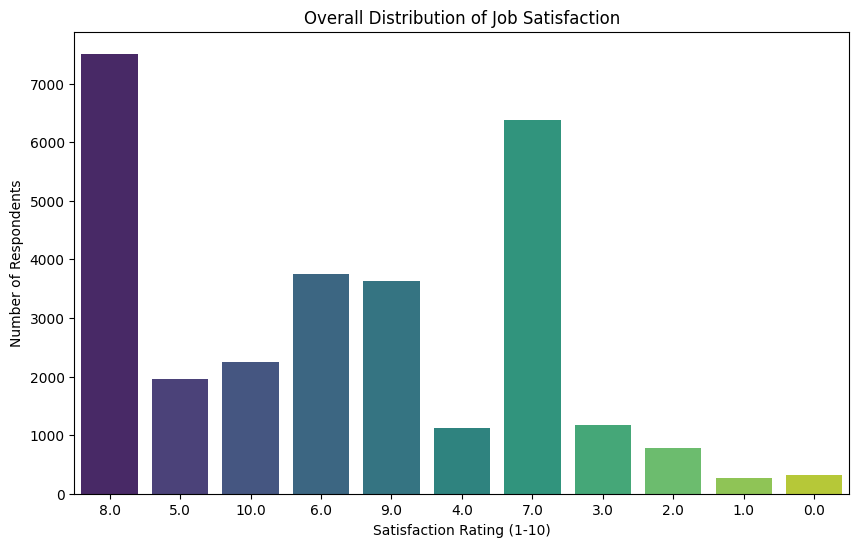

Total count for each satisfaction level:
JobSat
0.0      311
1.0      276
10.0    2251
2.0      772
3.0     1165
4.0     1130
5.0     1956
6.0     3751
7.0     6379
8.0     7509
9.0     3626
Name: count, dtype: int64


In [10]:
## Write your code here
plt.figure(figsize=(10,6))

# We use 'x' for JobSat to show the rating scale on the bottom
sns.countplot(data=df, x='JobSat', palette='viridis', hue='JobSat', legend=False)

plt.title('Overall Distribution of Job Satisfaction')
plt.xlabel('Satisfaction Rating (1-10)')
plt.ylabel('Number of Respondents')

plt.show()

print("Total count for each satisfaction level:")
print(df['JobSat'].value_counts().sort_index())

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


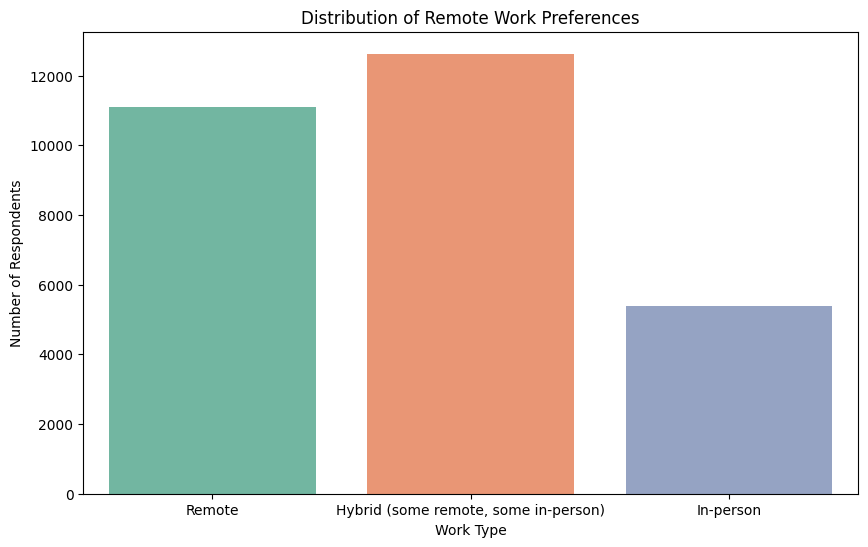

Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                10009   
Employed, full-time;Employed, part-time                                               49   
Employed, full-time;Independent contractor, fre...                                   829   
Employed, full-time;Independent contractor, fre...                                    53   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Independent contractor, free...                                     1   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but

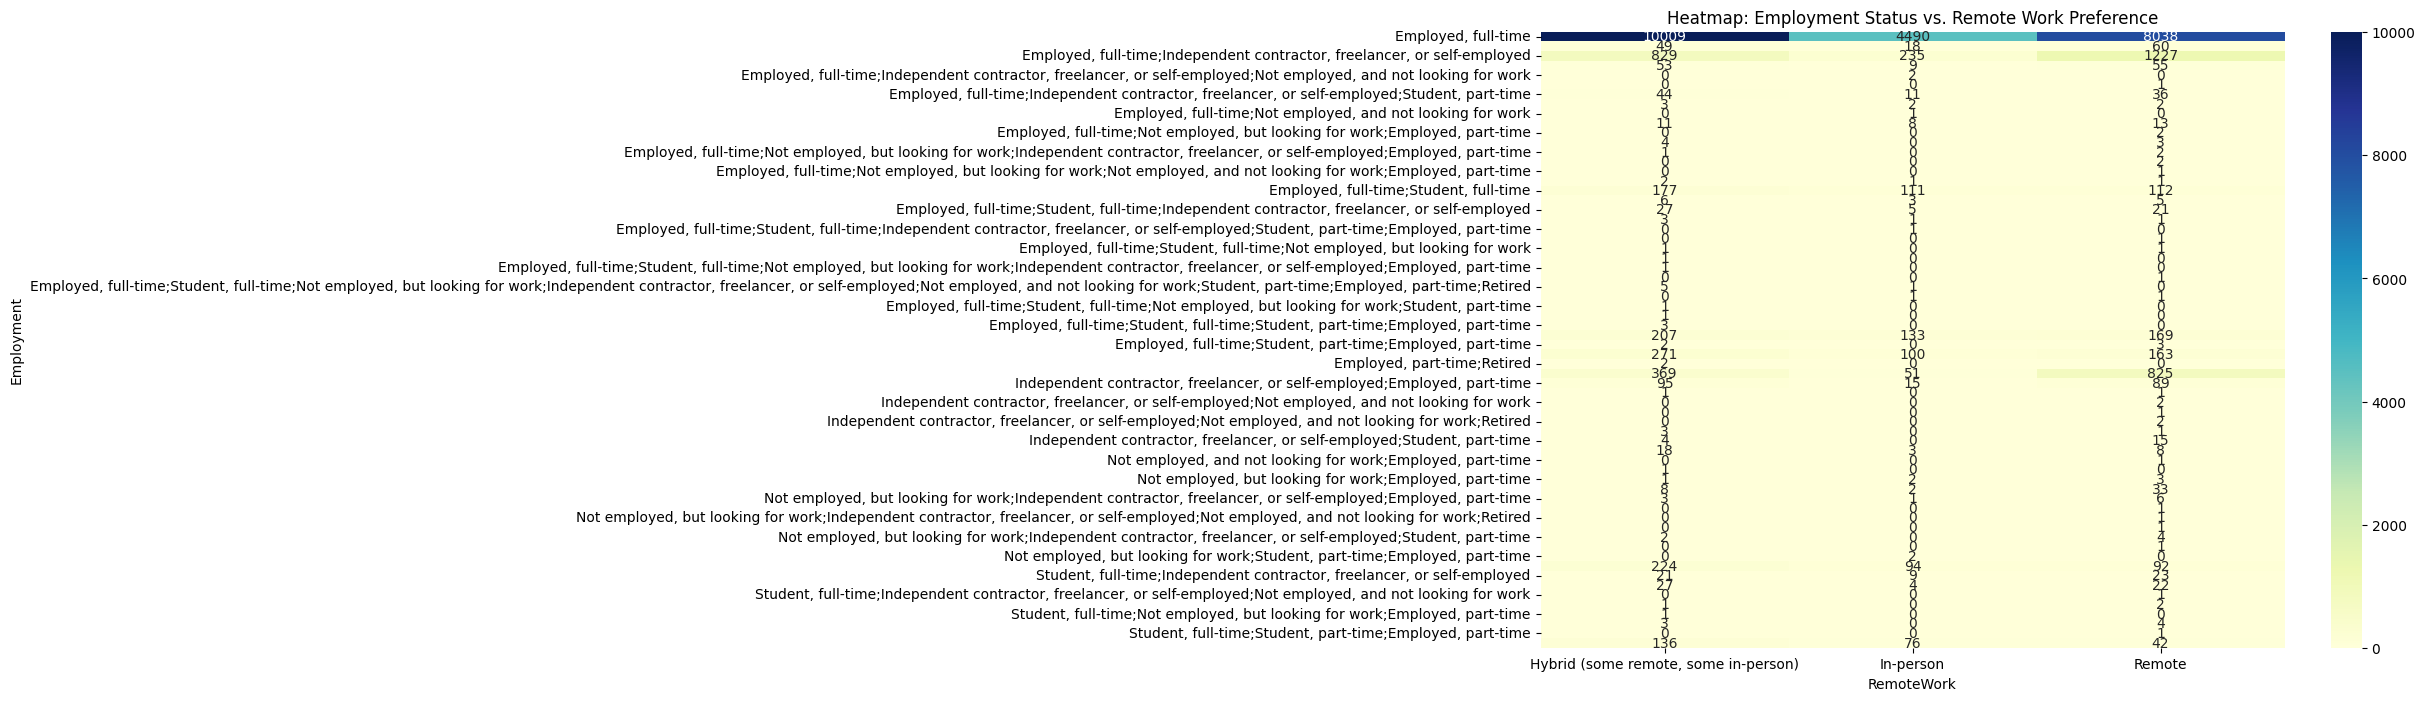

In [11]:
## Write your code here
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='RemoteWork', palette='Set2', hue='RemoteWork', legend=False)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Work Type')
plt.ylabel('Number of Respondents')
plt.show()

remote_employment_ct = pd.crosstab(df['Employment'], df['RemoteWork'])

print("Remote Work Preferences by Employment Type:")
print(remote_employment_ct)

plt.figure(figsize=(12,8))
sns.heatmap(remote_employment_ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap: Employment Status vs. Remote Work Preference')
plt.show()

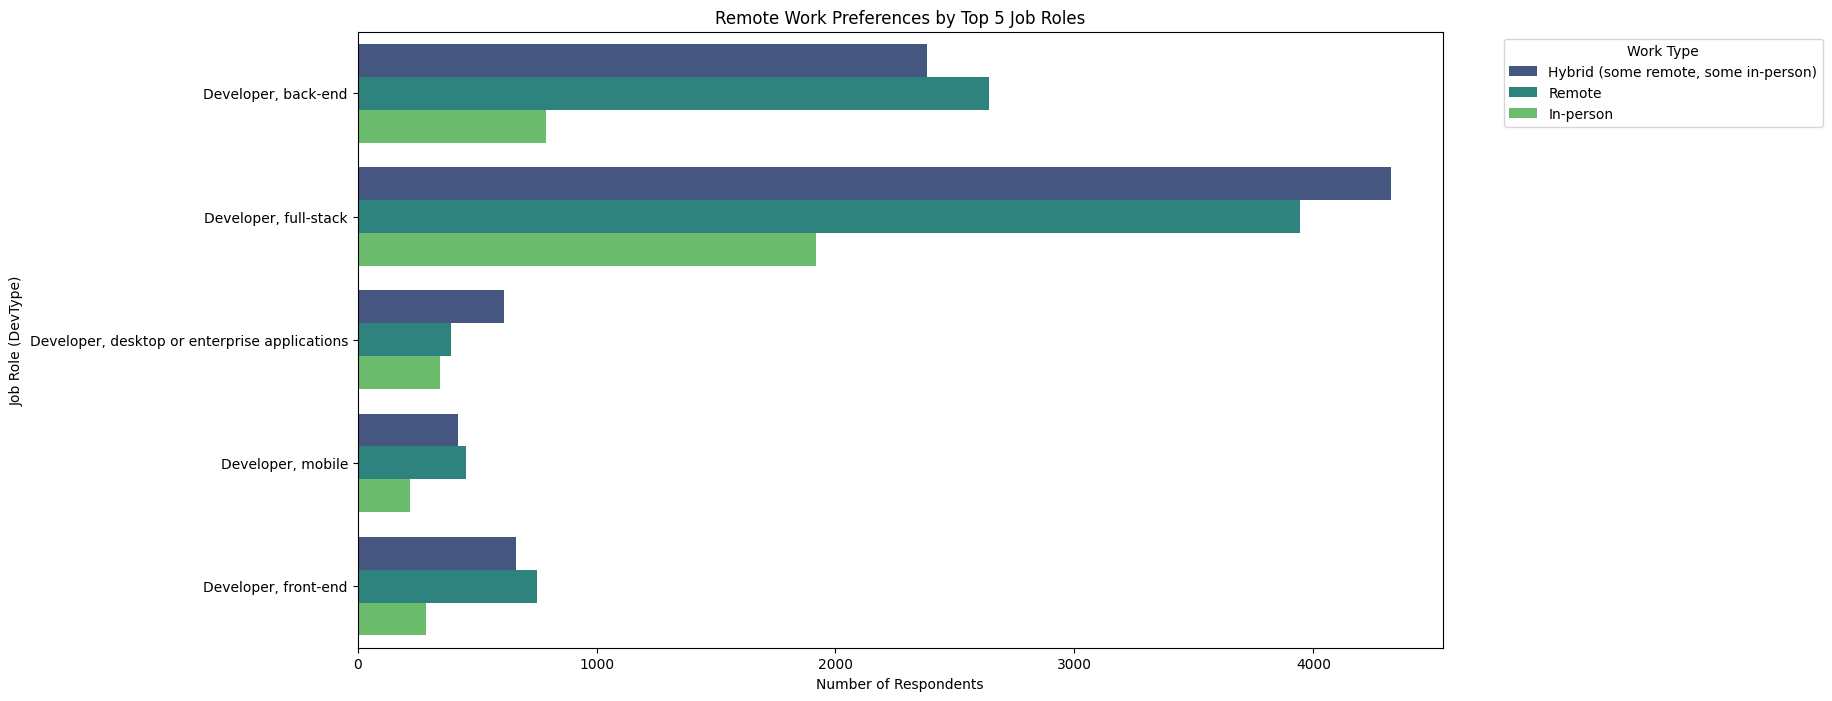

In [13]:

df['DevType'] = df['DevType'].fillna('Other')

top_roles = df['DevType'].value_counts().head(5).index

df_top_roles = df[df['DevType'].isin(top_roles)]

plt.figure(figsize=(14,8))
sns.countplot(data=df_top_roles, y='DevType', hue='RemoteWork', palette='viridis')

plt.title('Remote Work Preferences by Top 5 Job Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('Job Role (DevType)')
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


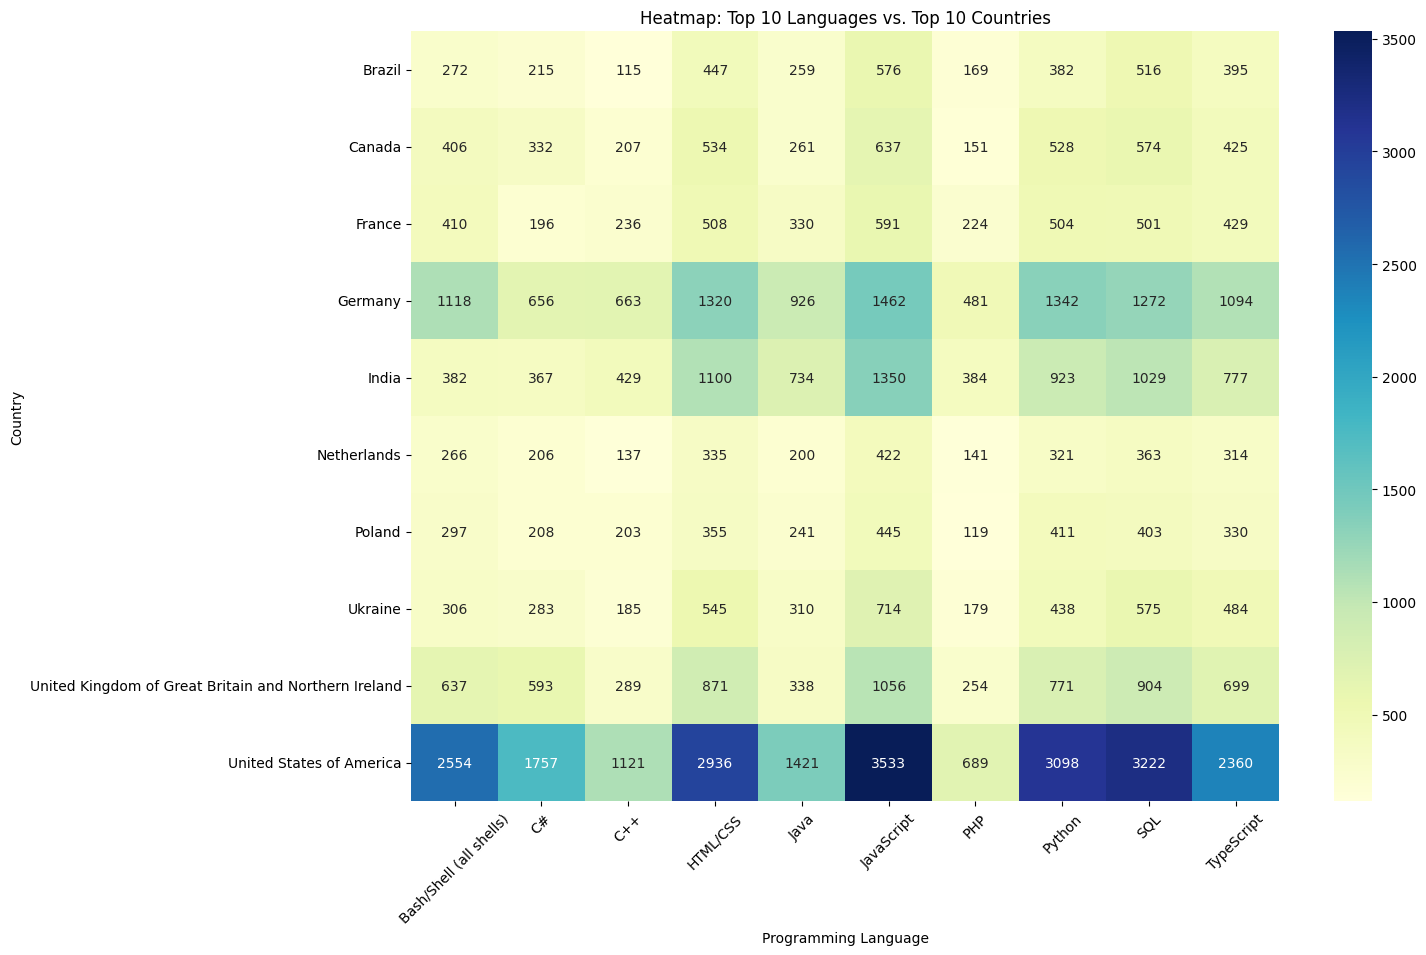

In [15]:
## Write your code here
lang_df = df[['Country', 'LanguageHaveWorkedWith']].copy()
lang_df['Language'] = lang_df['LanguageHaveWorkedWith'].str.split(';')
lang_df = lang_df.explode('Language', ignore_index=True)

top_10_countries = df['Country'].value_counts().head(10).index
top_10_languages = lang_df['Language'].value_counts().head(10).index

filtered_lang_df = lang_df[
    (lang_df['Country'].isin(top_10_countries)) & 
    (lang_df['Language'].isin(top_10_languages))
].copy()

heatmap_data = pd.crosstab(filtered_lang_df['Country'], filtered_lang_df['Language'])

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap: Top 10 Languages vs. Top 10 Countries')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


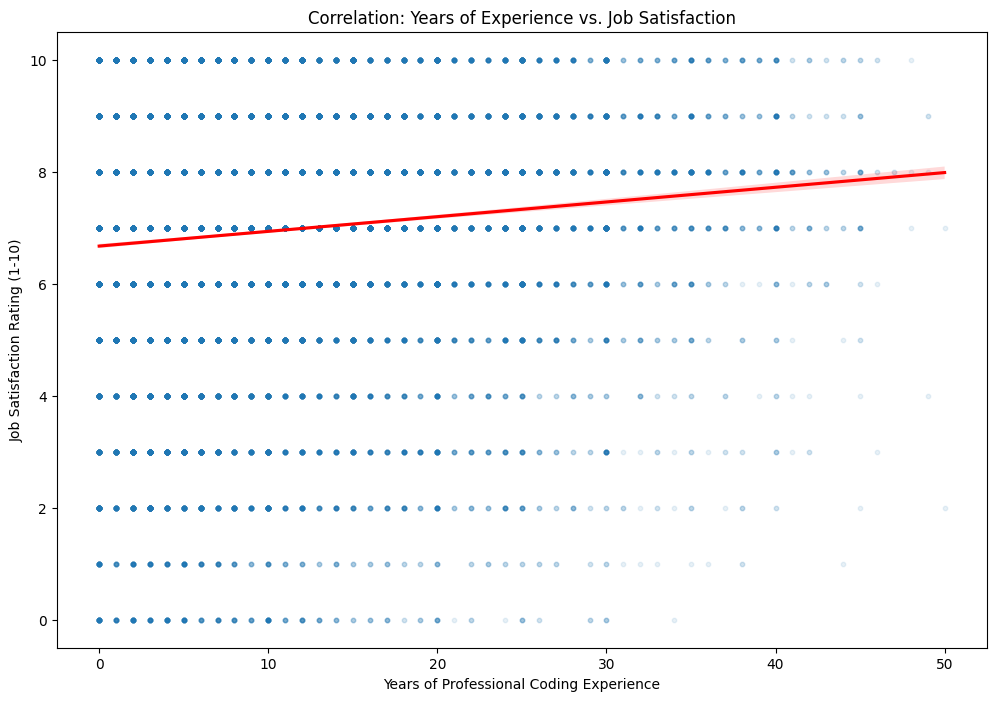

The Pearson correlation coefficient is: 0.1072


In [16]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

plt.figure(figsize=(12, 8))
sns.regplot(data=df, x='YearsCodePro', y='JobSat', 
            scatter_kws={'alpha':0.1, 's':10}, 
            line_kws={'color':'red'})

plt.title('Correlation: Years of Experience vs. Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Rating (1-10)')

plt.show()

correlation = df['YearsCodePro'].corr(df['JobSat'])
print(f"The Pearson correlation coefficient is: {correlation:.4f}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


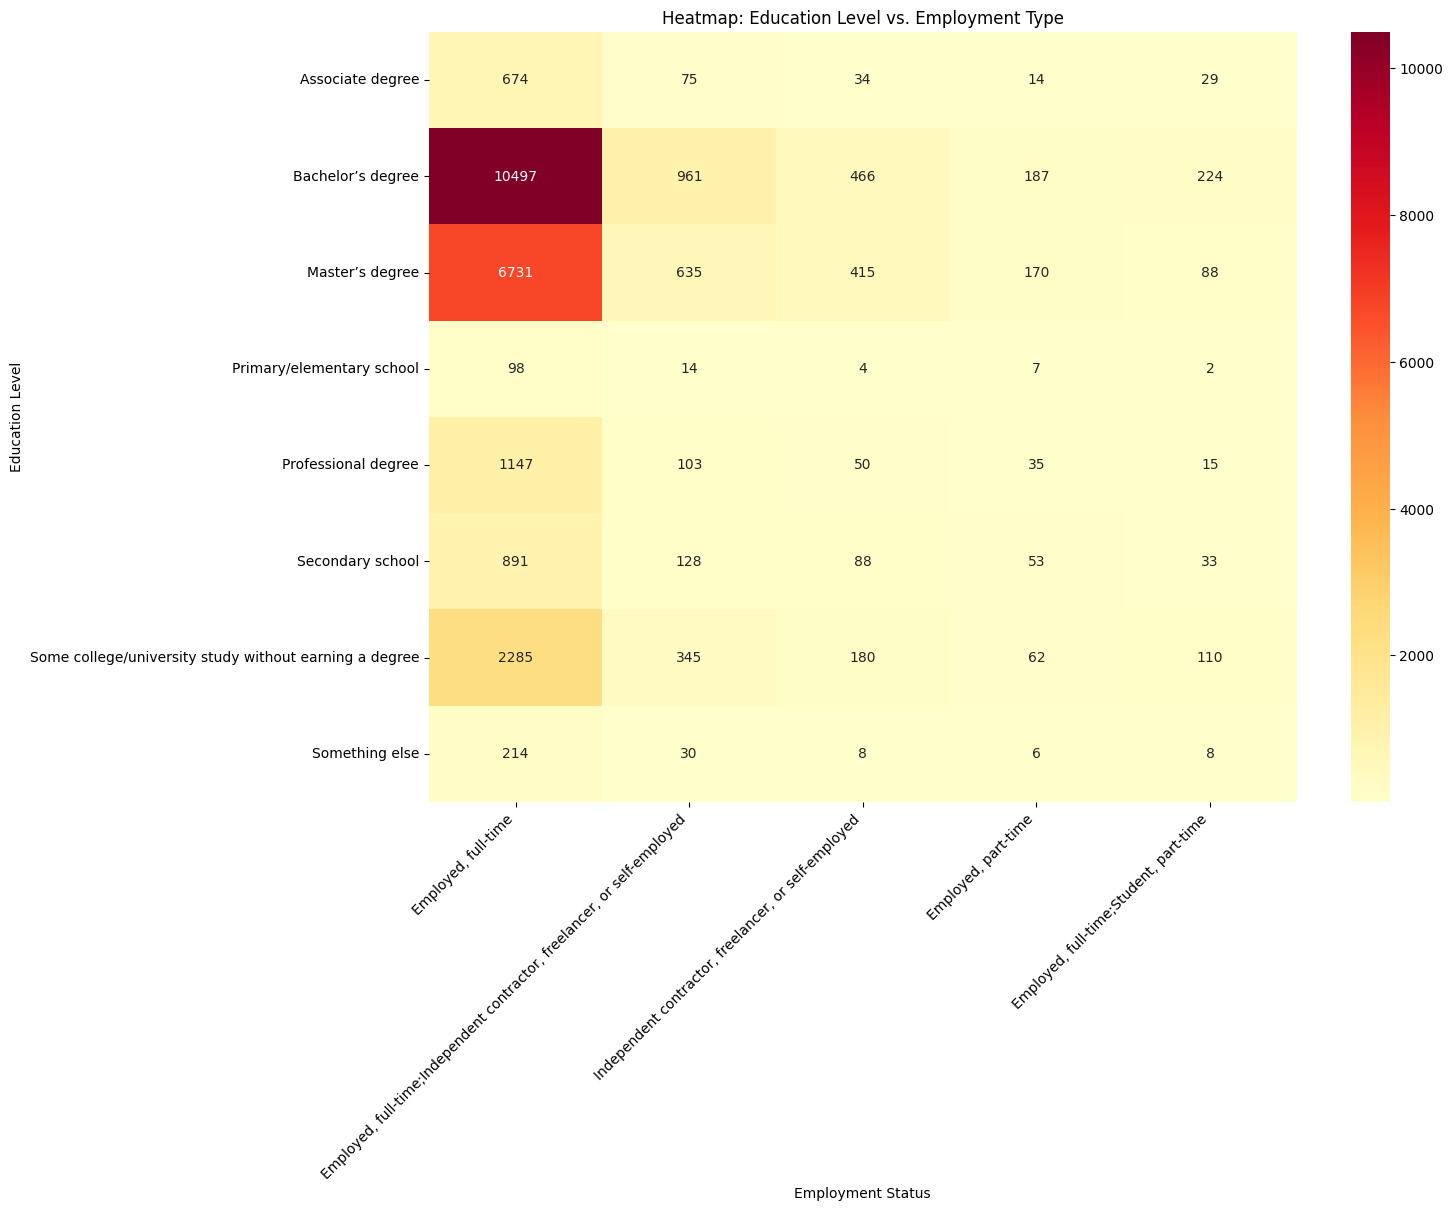

Top Education Levels found in dataset:
EdLevel_Short
Bachelor’s degree                                         13126
Master’s degree                                            8414
Some college/university study without earning a degree     3340
Secondary school                                           1508
Professional degree                                        1401
Name: count, dtype: int64


In [17]:
## Write your code here
df['EdLevel_Short'] = df['EdLevel'].str.split('(').str[0].str.strip()

edu_emp_ct = pd.crosstab(df['EdLevel_Short'], df['Employment'])

top_employment = df['Employment'].value_counts().head(5).index
edu_emp_filtered = edu_emp_ct[top_employment]

plt.figure(figsize=(14, 10))
sns.heatmap(edu_emp_filtered, annot=True, fmt="d", cmap="YlOrRd")

plt.title('Heatmap: Education Level vs. Employment Type')
plt.xlabel('Employment Status')
plt.ylabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Top Education Levels found in dataset:")
print(df['EdLevel_Short'].value_counts().head(5))

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [18]:
## Write your code here

# Save the modified dataframe to a CSV file
df.to_csv('Cleaned_StackOverflow_Data.csv', index=False)

print("Success! Your analyzed dataset has been saved as 'Cleaned_StackOverflow_Data.csv'.")

Success! Your analyzed dataset has been saved as 'Cleaned_StackOverflow_Data.csv'.


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
